In this jupyter notebook we will be exploring the haberman datset.This datset has the following independent variables and dependent variable.

1.Independent Variable-Age,Year of operation,Number of nodes
2.Dependent Variable-Death or Survived within 5 years of operations

Total records present in this dataset are 306.
Dependent Variable-1
Independent Variable-3

Our Objective is to check if the patient will survive within five years of operation based upon the age,year of operation and number of nodes present

We will perform Univarate and Multivarate Analysis on this data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Cancer_data=pd.read_csv("/home/karan/Downloads/haberman.csv")
print("Printing the data of the csv file")
Cancer_data['status']=Cancer_data.iloc[:,-1].map({1:"yes", 2:"no"})
Cancer_data.head()

Printing the data of the csv file


,age,year,nodes,status
0,30,64,1,yes
1,30,62,3,yes
2,30,65,0,yes
3,31,59,2,yes
4,31,65,4,yes


Now we will perform small test on our dataframe to check number of rows and coloumns it has


In [7]:
print("Shape of the dataframe.Number of rows and coloumns"+ str(Cancer_data.shape))

Shape of the dataframe.Number of rows and coloumns(306, 4)


In [14]:
print("Name of the coloumns")
print(Cancer_data.columns)

Name of the coloumns
Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [16]:
print("Status of the patients post Fiver years after operation.1->Alive,2->Dead")
print(Cancer_data.iloc[:,-1].value_counts())

Status of the patients
1    225
2     81
Name: status, dtype: int64


Univarate Analysis
We perform this analysis for one independent variable to check its effect on the Dependent Variable.Here we will check what is the effect of the Age,Year of Operation and Number of nodes on the ability of the person to survive cancer treatment within 5 years

We will first plot the effect of the age on the Cancer Treatment.We can clearly see from the graph below that we are not able to distinguish the effect of age on the Cancer survivor

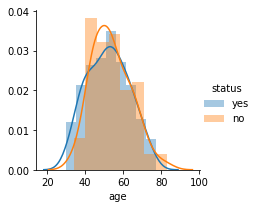

In [32]:
sns.FacetGrid(Cancer_data,hue='status')\
    .map(sns.distplot,"age")\
    .add_legend();
plt.show();

Now we will check the effect of the year of operation on the survivor of the operation.If the year of operation has any effect on the person surviving the Cancer.If you look at the Graph below you can observe that we are still not able to check if the yeaer of operation will have any effect on the survivability of the patitent on not.We are still not getting any clear cut answers.

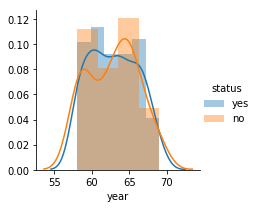

In [33]:
sns.FacetGrid(Cancer_data,hue='status')\
    .map(sns.distplot,"year")\
    .add_legend();
plt.show();

The last reamining feature on which we have to perform the test is the number of nodes.We will check if the survivability of the cancer patient is related to the number of nodes that are present.Again we are not getting any clear cut answers


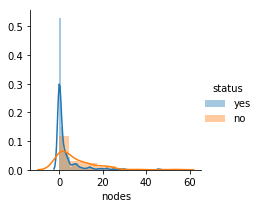

In [34]:
sns.FacetGrid(Cancer_data,hue='status')\
    .map(sns.distplot,"nodes")\
    .add_legend();
plt.show();

# Conclusion for Univarate Analysis:
From the Univarate analysis we are not able to clearly define the effect that the year of operation,age and number of nodes have on the Cancer status of the patient.There are several overlapping regions which are present.

MULTIVARATE Analysis:
In multivarate analysis we are checking the effect on the dependent variables of 2 independent variables.So we have 3 independent variables and we take 2.So 3C2 gives 3 graphs which we look at.We can ignore the diagonal graphs as it has both X and Y axis similar.In the below pair plot as well we are not able to cleary distinguish the status as on which value it depends upon.So even multivarate analysis is not well enough for classification

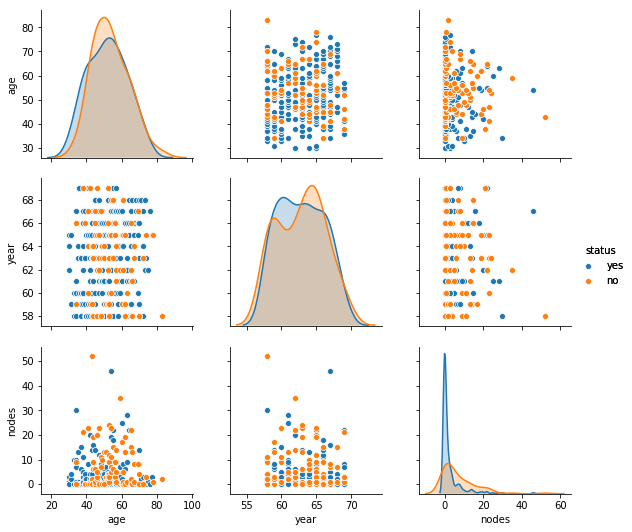

In [24]:
sns.pairplot(Cancer_data,hue='status')\
    .add_legend();
plt.show()

BOX and Whiskers Plot:
This graph basically gives the distribution around the Percentile.The middle of the box gives us the Median.The start line of the the box gives us the first quantile and the upper line of the box gives the third quantile.The Last line and the first line above and below the box gives the maximum and minimum value. 

1.We will plot the Box plot between age and status

2.We will plot the Box plot between nodes and status

3.We will plot the Box plot between year and status


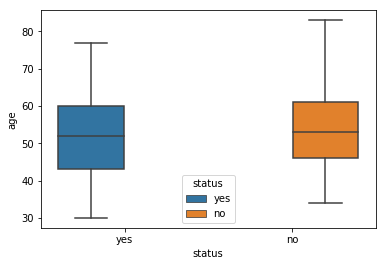

In [25]:
#Box plot between age and status
sns.boxplot(x='status',y='age',data=Cancer_data,hue='status')
plt.show()



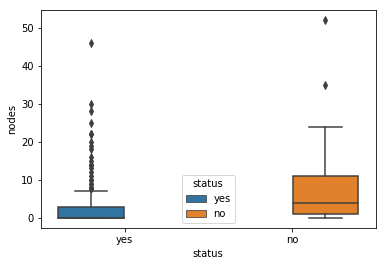

In [26]:
#Box plot between nodes and status
sns.boxplot(x='status',y='nodes',data=Cancer_data,hue='status')
plt.show()

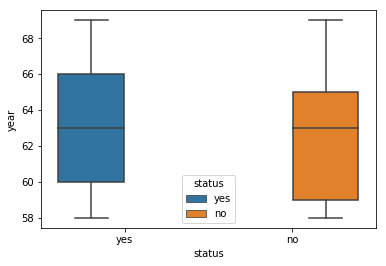

In [27]:
#Box plot between year and status
sns.boxplot(x='status',y='year',data=Cancer_data,hue='status')
plt.show()

VIOLIN Plot:
Violin plot is also used for Exploratory Data Analysis.They are similar to the Box Plot with the sole difference that they also show Probability Density.The black bar in the middle is for qanutile and the white dot in the middle is the median.

1.We will plot the Violin plot between age and status

2.We will plot the Violin plot between nodes and status

3.We will plot the Violin plot between year and status


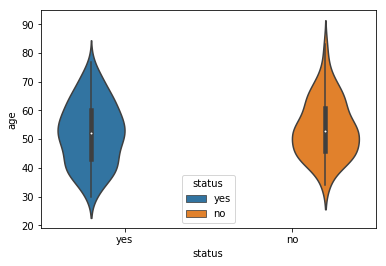

In [28]:
#Violin plot between age and status
sns.violinplot(x='status',y='age',data=Cancer_data,hue='status')
plt.show()

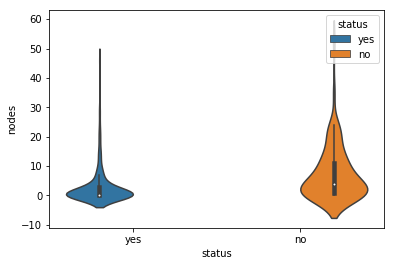

In [29]:
#Violin plot between nodes and status
sns.violinplot(x='status',y='nodes',data=Cancer_data,hue='status')
plt.show()

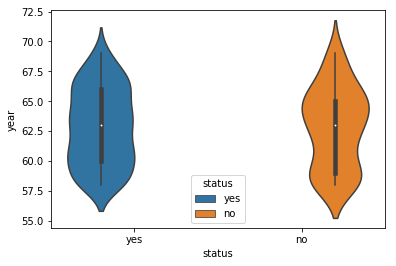

In [31]:
#Violin plot between years and status
sns.violinplot(x='status',y='year',data=Cancer_data,hue='status')
plt.show()

Plotting PDF and CDF for Cancer when status is Yes and when the status is No

In [36]:
Cancer_yes=pd.DataFrame()
Cancer_no=pd.DataFrame()

for i in range(0,306):

    if(Cancer_data.iloc[i,-1]=='yes'):

        Cancer_yes=Cancer_yes.append(Cancer_data.iloc[i,:5])#We are creating dataset when the status is Yes
    else:
        Cancer_no=Cancer_no.append(Cancer_data.iloc[i,:5])#We are creating dataset when the status is No

Now Plotting CDF and PDF for Status Yes.When we take age

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


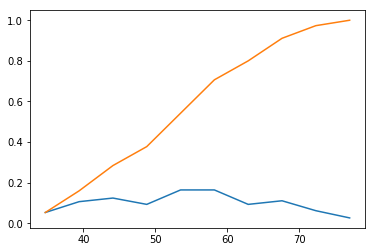

In [37]:
counts,bin_edge=np.histogram(Cancer_yes['age'],bins=10,density=True)
pdf=counts/sum(counts)
print(pdf)
print(bin_edge)

cdf=np.cumsum(pdf)
plt.plot(bin_edge[1:],pdf)
plt.plot(bin_edge[1:],cdf)
plt.show()

Now Plotting CDF and PDF for Status Yes.When we take year

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


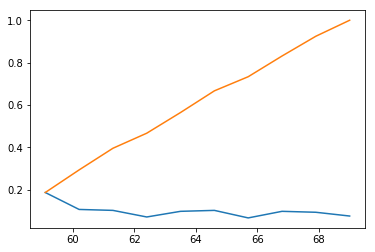

In [39]:
counts,bin_edge=np.histogram(Cancer_yes['year'],bins=10,density=True)
pdf=counts/sum(counts)
print(pdf)
print(bin_edge)

cdf=np.cumsum(pdf)
plt.plot(bin_edge[1:],pdf)
plt.plot(bin_edge[1:],cdf)
plt.show()

Now Plotting CDF and PDF for Status Yes.When we take nodes

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


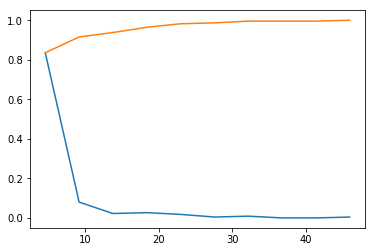

In [38]:
counts,bin_edge=np.histogram(Cancer_yes['nodes'],bins=10,density=True)
pdf=counts/sum(counts)
print(pdf)
print(bin_edge)

cdf=np.cumsum(pdf)
plt.plot(bin_edge[1:],pdf)
plt.plot(bin_edge[1:],cdf)
plt.show()

Similarly we are gonna do for when Cancer_status is No

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


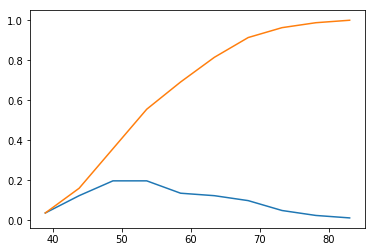

In [40]:
counts,bin_edge=np.histogram(Cancer_no['age'],bins=10,density=True)
pdf=counts/sum(counts)
print(pdf)
print(bin_edge)

cdf=np.cumsum(pdf)
plt.plot(bin_edge[1:],pdf)
plt.plot(bin_edge[1:],cdf)
plt.show()

[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


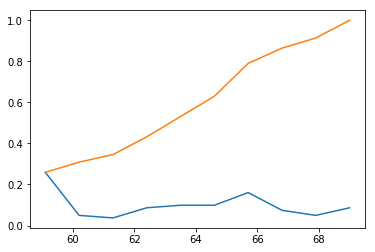

In [41]:
counts,bin_edge=np.histogram(Cancer_no['year'],bins=10,density=True)
pdf=counts/sum(counts)
print(pdf)
print(bin_edge)

cdf=np.cumsum(pdf)
plt.plot(bin_edge[1:],pdf)
plt.plot(bin_edge[1:],cdf)
plt.show()

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


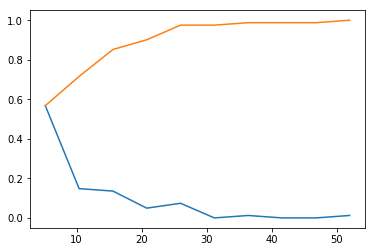

In [42]:
counts,bin_edge=np.histogram(Cancer_no['nodes'],bins=10,density=True)
pdf=counts/sum(counts)
print(pdf)
print(bin_edge)

cdf=np.cumsum(pdf)
plt.plot(bin_edge[1:],pdf)
plt.plot(bin_edge[1:],cdf)
plt.show()

# Conclusion
It can be observed from the above graphs that we are not able to classify the dataset by using Multivariate or the Univariate.In either of the analysis we are seeing overlapping.